# Business Understanding
#The dataset is provided by the Taarifa and the Tanzanian Ministry of Water to predict the condition of a water well, basing on the sort of pump and when it was installed, so that the Government of Tanzania in patternship with NGOs can find new patterns of constructing new wells and provide clean water to Tanzanian people.

## Data Understanding


#Data understanding enhance and build a clear picture on what type of data am handling in terms of its source,structure,size, data types and wether the data has problems like inconsistencies and missing values to be handled later before performing any further modeling or presentation.

In [4]:
#importing the necessary library for loading datatsets
import pandas as pd
import numpy as np

In [5]:
y_train_data=  pd.read_csv("Train_set_depend.csv")
y_train_data.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [6]:
#displaying train dataset for quick review
x_train_data =  pd.read_csv("Train_set_values.csv")
x_train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
#Quick understanding of how many rows and columns the train dataset contains it has 59400 rows and 40 columns
x_train_data.shape

(59400, 40)

In [53]:
#checking train dataset features
x_train_data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [7]:
#displaying test dataset for quick review
x_test_data =  pd.read_csv("Test_set_val_inde pred.csv")
x_test_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [8]:
#Quick understanding of how many rows and columns test dataset contains, it has 14850 rows and 40 columns
x_test_data.shape

(14850, 40)

In [10]:
#checking test dataset features
x_test_data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

# ##Merging train and test data for perefect data cleaning before splitting.

#I prefer to combine train and test dataset with an objective of performing whole cleaning process once and after, split again both dataset which saves time and on the model it reduce bias and achieve better accuracy..

In [9]:
#code for combining train and test dataset
df = pd.concat([x_test_data.assign(indic="test"), x_train_data.assign(indic="train")])
df.head() #croschecking the first 5 rows 

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,indic
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,test
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,test
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,test
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,test
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,test


# Exploratory Data Analysis
#Is a crucial and essential step of data science, involves studying and exploring datasets at hand to understand their patterns,structure,trace outliers,cleaning and identify relationships between variables,before undertaking extra formal statistical analyses or modeling.

# ##Descriptive statistics
#After merging train and test data now we have 74250 rows and 41 columns, we can perform descriptive statistcis to understand our data more.

In [10]:
#invoking the object variable to display the dataset shape structure
df.shape  #Merged train dataset and test dataset now contains 74250 rows and 41 columns

(74250, 41)

In [11]:
df.info()#quick overview of DataFrame, crosschecking its size, column names, data types, number 
#of non-null values. It's useful for understanding data structure and checking missing values.

<class 'pandas.core.frame.DataFrame'>
Index: 74250 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69743 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74248 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lga    

In [11]:
#statistical summary of numerical values 
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [12]:
#checking numeric datatypes
df_num=df.select_dtypes(np.number)
df_num

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,50785,0.0,1996,35.290799,-4.059696,0,21,3,321,2012
1,51630,0.0,1569,36.656709,-3.309214,0,2,2,300,2000
2,17168,0.0,1567,34.767863,-5.004344,0,13,2,500,2010
3,45559,0.0,267,38.058046,-9.418672,0,80,43,250,1987
4,49871,500.0,1260,35.006123,-10.950412,0,10,3,60,2000
...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999
59396,27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996
59397,37057,0.0,0,34.017087,-8.750434,0,12,7,0,0
59398,31282,0.0,0,35.861315,-6.378573,0,1,4,0,0


In [13]:
df_num.isnull()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
59395,False,False,False,False,False,False,False,False,False,False
59396,False,False,False,False,False,False,False,False,False,False
59397,False,False,False,False,False,False,False,False,False,False
59398,False,False,False,False,False,False,False,False,False,False


In [14]:
df_num.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.007150,-0.003227,-0.001745,0.003296,-0.004497,-0.001930,-0.002566,-0.005442,-0.002588
amount_tsh,-0.007150,1.000000,0.079851,0.023048,-0.055923,0.005384,-0.027122,-0.024201,0.018385,0.070927
gps_height,-0.003227,0.079851,1.000000,0.149071,-0.037621,0.008042,-0.182366,-0.170897,0.134373,0.658344
longitude,-0.001745,0.023048,0.149071,1.000000,-0.426643,0.024640,0.032260,0.150908,0.087439,0.396858
latitude,0.003296,-0.055923,-0.037621,-0.426643,1.000000,0.006086,-0.217501,-0.200048,-0.022534,-0.247557
num_private,-0.004497,0.005384,0.008042,0.024640,0.006086,1.000000,-0.021277,-0.005264,0.003449,0.027228
region_code,-0.001930,-0.027122,-0.182366,0.032260,-0.217501,-0.021277,1.000000,0.680393,0.094665,0.031397
district_code,-0.002566,-0.024201,-0.170897,0.150908,-0.200048,-0.005264,0.680393,1.000000,0.062749,0.047892
population,-0.005442,0.018385,0.134373,0.087439,-0.022534,0.003449,0.094665,0.062749,1.000000,0.263189
construction_year,-0.002588,0.070927,0.658344,0.396858,-0.247557,0.027228,0.031397,0.047892,0.263189,1.000000


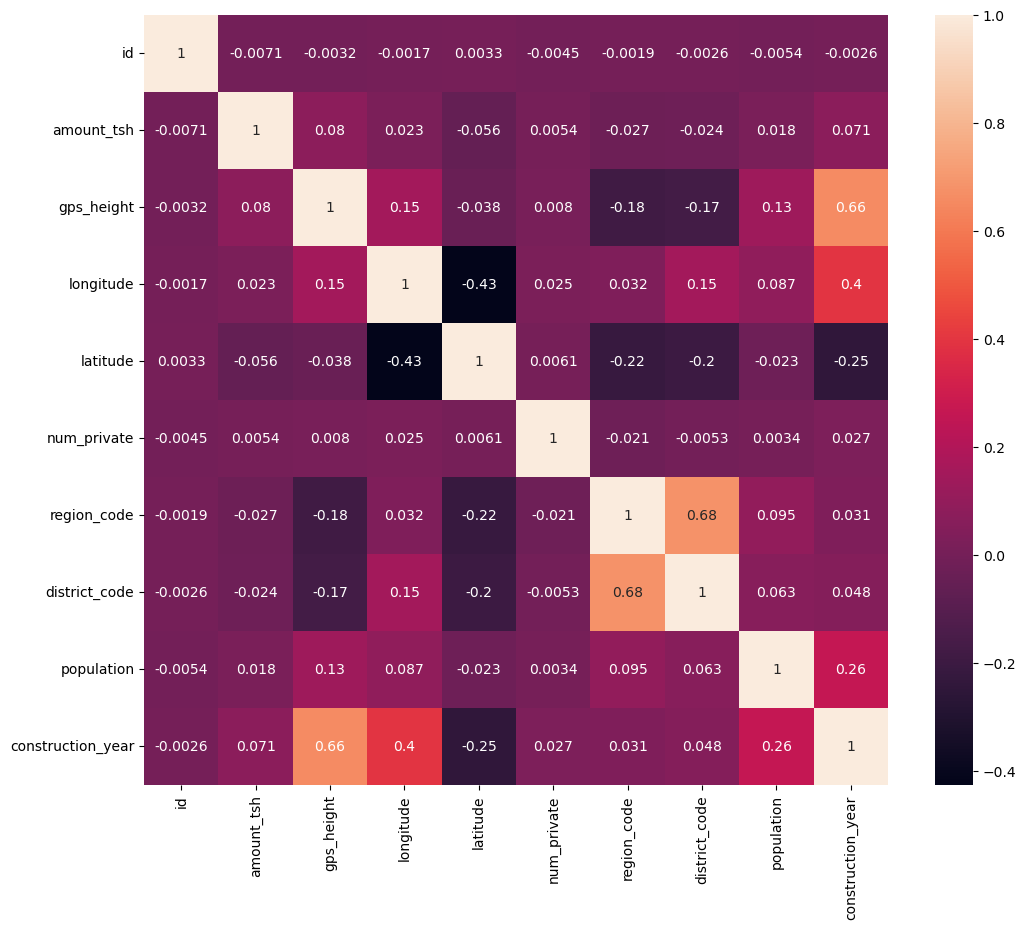

In [201]:
import seaborn as sns
plt.figure(figsize=(12,10))
#cor = df_num.corr()
sns.heatmap(df_num.corr(), annot=True)
plt.show()

In [ ]:
#from the heatma visualization above it shows some poor correllation of numerical variables which needs to be filtered out has no importance

In [15]:
df_num.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [16]:
#filtering categorical by dropping numeric variables
cat_var =df.drop(columns=['id','amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'])

In [17]:
#checking the categorical datatypes
cat_var

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,indic
0,2013-02-04,Dmdd,DMDD,Dinamu Secondary School,Internal,Magoma,Manyara,Mbulu,Bashay,True,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,test
1,2013-02-04,Government Of Tanzania,DWE,Kimnyak,Pangani,Kimnyak,Arusha,Arusha Rural,Kimnyaki,True,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,test
2,2013-02-01,NaN,NaN,Puma Secondary,Internal,Msatu,Singida,Singida Rural,Puma,True,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,test
3,2013-01-22,Finn Water,FINN WATER,Kwa Mzee Pange,Ruvuma / Southern Coast,Kipindimbi,Lindi,Liwale,Mkutano,NaN,...,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,test
4,2013-03-27,Bruder,BRUDER,Kwa Mzee Turuka,Ruvuma / Southern Coast,Losonga,Ruvuma,Mbinga,Mbinga Urban,NaN,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,2013-05-03,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,True,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,train
59396,2011-05-07,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,True,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,train
59397,2011-04-11,NaN,NaN,Mashine,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,True,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,train
59398,2011-03-08,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,True,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,train


In [18]:
cat_var.isnull()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,indic
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59397,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
#Through a quick check on the dataframe below some rows have  similar records
#  payment, payment_type
#  water_quality, quality_group
#  source, source_class
#  subvillage, region, region_code, district_code, lga, ward
#  waterpoint_type, waterpoint_type_group
#  scheme_name, scheme_management
cat_var[cat_var.index.duplicated()]

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,indic
0,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,train
1,2013-03-06,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,train
2,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,train
3,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,train
4,2011-07-13,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,2012-11-09,District Council,District council,Mwanzelwa,Internal,Lutona,Tabora,Uyui,Loya,True,...,milky,milky,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,train
14846,2012-10-09,Dwsp,DWE,Shuleni,Internal,Ibadakuli Kati,Shinyanga,Shinyanga Urban,Ibadakuli,False,...,salty,salty,insufficient,insufficient,hand dtw,borehole,groundwater,hand pump,hand pump,train
14847,2011-02-21,Woyege,WOYEGE,Woyege,Wami / Ruvu,Kimbangulile,Pwani,Mkuranga,Tambani,True,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,train
14848,2013-10-03,Germany Republi,CES,Kwa Amphales Masaa,Pangani,Saa,Kilimanjaro,Hai,Machame Kaskazini,True,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,train


In [20]:
# checking Missing values
#code below checks missing values and  computes its summation and percentage wise in a dataframe format for a quick review in a descending
# checking Missing values
#code below checks missing values and  computes its summation and percentage wise in a dataframe format for a quick review in a descending order.
total=df.isnull().sum().sort_values(ascending=False)
percent=((df.isnull().sum()/df.isnull().count())*100)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent%'])
missing_data

,Total,Percent%
scheme_name,36052,48.554882
scheme_management,4847,6.527946
installer,4532,6.103704
funder,4507,6.070034
public_meeting,4155,5.595960
permit,3793,5.108418
subvillage,470,0.632997
wpt_name,2,0.002694
water_quality,0,0.000000
extraction_type_class,0,0.000000


In [21]:
# checking Missing values
#code below checks missing values and  computes its summation and percentage wise in a dataframe format for a quick review in a descending order.
total=df.isnull().sum().sort_values(ascending=False)
percent=((df.isnull().sum()/df.isnull().count())*100)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent%'])

In [106]:
#invoking the object variable to display the information about total number of missing values and its percentage
missing_data

,Total,Percent%
scheme_name,36052,48.554882
scheme_management,4847,6.527946
installer,4532,6.103704
funder,4507,6.070034
public_meeting,4155,5.595960
permit,3793,5.108418
subvillage,470,0.632997
wpt_name,2,0.002694
water_quality,0,0.000000
extraction_type_class,0,0.000000


In [22]:
#missing values greater than 60%
missing_data[missing_data['Percent%']>=.60]

,Total,Percent%
scheme_name,36052,48.554882
scheme_management,4847,6.527946
installer,4532,6.103704
funder,4507,6.070034
public_meeting,4155,5.595960
permit,3793,5.108418
subvillage,470,0.632997


In [23]:

import plotly.express as px
var_missing = df[['scheme_name','scheme_management','funder','installer','public_meeting','permit','subvillage']]
var=pd.DataFrame(var_missing)
var

,scheme_name,scheme_management,funder,installer,public_meeting,permit,subvillage
0,NaN,Parastatal,Dmdd,DMDD,True,True,Magoma
1,TPRI pipe line,VWC,Government Of Tanzania,DWE,True,True,Kimnyak
2,P,VWC,NaN,NaN,True,NaN,Msatu
3,NaN,VWC,Finn Water,FINN WATER,NaN,True,Kipindimbi
4,BRUDER,Water Board,Bruder,BRUDER,NaN,True,Losonga
...,...,...,...,...,...,...,...
59395,Losaa Kia water supply,Water Board,Germany Republi,CES,True,True,Kiduruni
59396,Ikondo electrical water sch,VWC,Cefa-njombe,Cefa,True,True,Igumbilo
59397,NaN,VWC,NaN,NaN,True,False,Madungulu
59398,NaN,VWC,Malec,Musa,True,True,Mwinyi


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns 
labels=['scheme_name','scheme_management','funder','installer','public_meeting','permit','subvillage']


#From the dataframe above "scheme_name" has 48% missing values ,"scheme_management has 7% missing values","installer has 6% missing values","funder has 6% missing values","public_meeting has 5% missing values","permit" has 5% missing values,"subvillage has 1% missing values this gives reason of not deleting or dropping any columns if they are not similar in context, 80% missing values holds ground to be deleted or dropped like the column for 'num_private' its values are 99% zero.
#Scheme_name having the highest missing value 36052 while wpt 2 having the least missing values, This implies that particular care need to be taken care of  while handling  columns with missing values especially the most effected in order to have accuracy while modelling.

# ##Handling Missing Values

#Before droping lets crosscheck records which are similar but have different feature's name, so that we can have that assurity of dropping 1 column especially which is most affected with missing values like scheme_name.

In [26]:
#checking first 5 rows
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,indic
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,test
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,test
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,test
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,test
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,test


In [28]:
#checking last 5 rows
df.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,indic
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,train
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,train
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,train
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,train
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,train


In [42]:
#Through a quick check on the dataframe above the following records are similar on the above dataframe
#  payment, payment_type
#  water_quality, quality_group
#  source, source_class
#  subvillage, region, region_code, district_code, lga, ward
#  waterpoint_type, waterpoint_type_group
#  scheme_name, scheme_management

In [29]:
#checking columns labels
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'indic'],
      dtype='object')

# Dropping unnecessary features

In [30]:
#Dropping unnecessary features
features =df.drop(columns=['id', 'date_recorded', 'funder', 'gps_height',
       'installer', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'quality_group', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'])
df=features

In [36]:
df

,amount_tsh,longitude,latitude,region,scheme_name,construction_year,extraction_type,payment_type,water_quality,quantity,source,indic
0,0.0,35.290799,-4.059696,Manyara,NaN,2012,other,never pay,soft,seasonal,rainwater harvesting,test
1,0.0,36.656709,-3.309214,Arusha,TPRI pipe line,2000,gravity,never pay,soft,insufficient,spring,test
2,0.0,34.767863,-5.004344,Singida,P,2010,other,never pay,soft,insufficient,rainwater harvesting,test
3,0.0,38.058046,-9.418672,Lindi,NaN,1987,other,unknown,soft,dry,shallow well,test
4,500.0,35.006123,-10.950412,Ruvuma,BRUDER,2000,gravity,monthly,soft,enough,spring,test
...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,37.169807,-3.253847,Kilimanjaro,Losaa Kia water supply,1999,gravity,per bucket,soft,enough,spring,train
59396,4700.0,35.249991,-9.070629,Iringa,Ikondo electrical water sch,1996,gravity,annually,soft,enough,river,train
59397,0.0,34.017087,-8.750434,Mbeya,NaN,0,swn 80,monthly,fluoride,enough,machine dbh,train
59398,0.0,35.861315,-6.378573,Dodoma,NaN,0,nira/tanira,never pay,soft,insufficient,shallow well,train


In [31]:
df.columns

Index(['amount_tsh', 'longitude', 'latitude', 'region', 'scheme_name',
       'construction_year', 'extraction_type', 'payment_type', 'water_quality',
       'quantity', 'source', 'indic'],
      dtype='object')

# checking correllation on how variables are relating

# Visualizing correllation
#Heatmap is a two-dimensional visual representation of the variables. It is considered one of the best visual graphical representations when you want to show complex data

In [32]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
#from matplotlib import dates as md
import seaborn as sns
import plotly.graph_objs as go


In [33]:
#selected features
df.columns

Index(['amount_tsh', 'longitude', 'latitude', 'region', 'scheme_name',
       'construction_year', 'extraction_type', 'payment_type', 'water_quality',
       'quantity', 'source', 'indic'],
      dtype='object')

In [34]:
df.shape #from the output number of rows and columns have reduced after dropping some records 

(74250, 12)

In [68]:
#checking missing totals and percentage.
total=df.isnull().sum().sort_values(ascending=False)
percent=((df.isnull().sum()/df.isnull().count())*100)
data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])

In [69]:
data

,Total,Percent
scheme_name,36052,48.554882
amount_tsh,0,0.000000
longitude,0,0.000000
latitude,0,0.000000
region,0,0.000000
construction_year,0,0.000000
extraction_type,0,0.000000
payment_type,0,0.000000
water_quality,0,0.000000
quantity,0,0.000000


Text(0.5, 1.0, 'Missing value in the dataset')

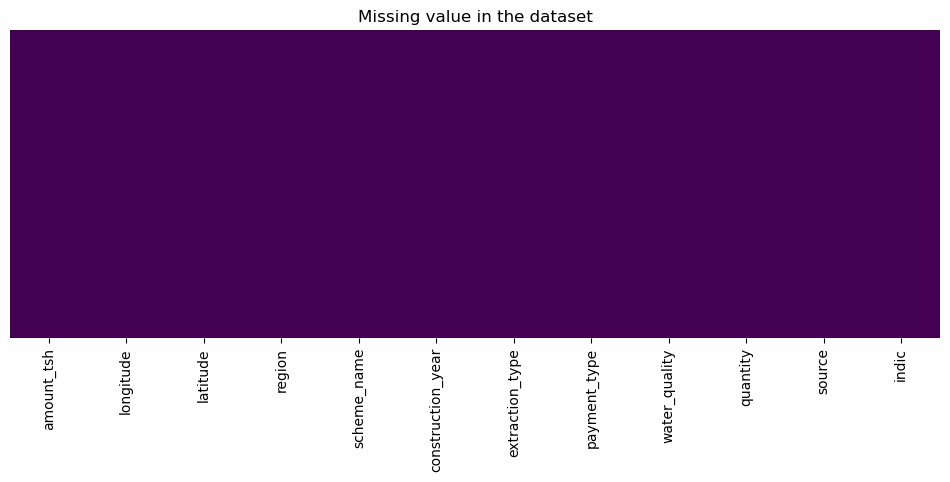

In [80]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

# ##Filling the missing value

In [35]:
#Retrieving the missing labels and filling it with unknown to avoid loosing data by dropping which is risk on this project.
df["scheme_name"].fillna("unknown", inplace = True)
df

,amount_tsh,longitude,latitude,region,scheme_name,construction_year,extraction_type,payment_type,water_quality,quantity,source,indic
0,0.0,35.290799,-4.059696,Manyara,unknown,2012,other,never pay,soft,seasonal,rainwater harvesting,test
1,0.0,36.656709,-3.309214,Arusha,TPRI pipe line,2000,gravity,never pay,soft,insufficient,spring,test
2,0.0,34.767863,-5.004344,Singida,P,2010,other,never pay,soft,insufficient,rainwater harvesting,test
3,0.0,38.058046,-9.418672,Lindi,unknown,1987,other,unknown,soft,dry,shallow well,test
4,500.0,35.006123,-10.950412,Ruvuma,BRUDER,2000,gravity,monthly,soft,enough,spring,test
...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,37.169807,-3.253847,Kilimanjaro,Losaa Kia water supply,1999,gravity,per bucket,soft,enough,spring,train
59396,4700.0,35.249991,-9.070629,Iringa,Ikondo electrical water sch,1996,gravity,annually,soft,enough,river,train
59397,0.0,34.017087,-8.750434,Mbeya,unknown,0,swn 80,monthly,fluoride,enough,machine dbh,train
59398,0.0,35.861315,-6.378573,Dodoma,unknown,0,nira/tanira,never pay,soft,insufficient,shallow well,train


In [36]:
#check any missing values in our dataset after cleaning and filling the missing values
df.isnull().sum()

amount_tsh           0
longitude            0
latitude             0
region               0
scheme_name          0
construction_year    0
extraction_type      0
payment_type         0
water_quality        0
quantity             0
source               0
indic                0
dtype: int64

# Crosschecking and handling outliers

In [37]:
def checking_outliers(df):
    df = df.select_dtypes(include=['int64', 'float64'])  # Selecting numerical columns
    for col in df.columns:
        data_mean, data_std = df[col].mean(), df[col].std()  
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off

        # Identify and handle outliers
        outliers = (df[col] < lower) | (df[col] > upper)
        df.loc[outliers, col] = df[col].median()  

    return df

In [73]:
#viewing
checking_outliers(df)

,amount_tsh,longitude,latitude,construction_year
0,0.0,35.290799,-4.059696,2012
1,0.0,36.656709,-3.309214,2000
2,0.0,34.767863,-5.004344,2010
3,0.0,38.058046,-9.418672,1987
4,500.0,35.006123,-10.950412,2000
...,...,...,...,...
59395,10.0,37.169807,-3.253847,1999
59396,4700.0,35.249991,-9.070629,1996
59397,0.0,34.017087,-8.750434,0
59398,0.0,35.861315,-6.378573,0


# ###Feature Selection

#Feature transformation should be done before splitting data to avoid further data leakage which might affect our model accuracy if done after.

In [38]:
#loading data
df

,amount_tsh,longitude,latitude,region,scheme_name,construction_year,extraction_type,payment_type,water_quality,quantity,source,indic
0,0.0,35.290799,-4.059696,Manyara,unknown,2012,other,never pay,soft,seasonal,rainwater harvesting,test
1,0.0,36.656709,-3.309214,Arusha,TPRI pipe line,2000,gravity,never pay,soft,insufficient,spring,test
2,0.0,34.767863,-5.004344,Singida,P,2010,other,never pay,soft,insufficient,rainwater harvesting,test
3,0.0,38.058046,-9.418672,Lindi,unknown,1987,other,unknown,soft,dry,shallow well,test
4,500.0,35.006123,-10.950412,Ruvuma,BRUDER,2000,gravity,monthly,soft,enough,spring,test
...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,37.169807,-3.253847,Kilimanjaro,Losaa Kia water supply,1999,gravity,per bucket,soft,enough,spring,train
59396,4700.0,35.249991,-9.070629,Iringa,Ikondo electrical water sch,1996,gravity,annually,soft,enough,river,train
59397,0.0,34.017087,-8.750434,Mbeya,unknown,0,swn 80,monthly,fluoride,enough,machine dbh,train
59398,0.0,35.861315,-6.378573,Dodoma,unknown,0,nira/tanira,never pay,soft,insufficient,shallow well,train


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

# Data preparation For Modelling

### Splitting Test and Train dataset  after cleaning the data,

In [42]:
test, train = df[df["indic"].eq("test")], df[df["indic"].eq("train")]

In [43]:
#loading  first 5 test values
test.head()

,amount_tsh,longitude,latitude,region,scheme_name,construction_year,extraction_type,payment_type,water_quality,quantity,source,indic
0,0.0,35.290799,-4.059696,Manyara,unknown,2012,other,never pay,soft,seasonal,rainwater harvesting,test
1,0.0,36.656709,-3.309214,Arusha,TPRI pipe line,2000,gravity,never pay,soft,insufficient,spring,test
2,0.0,34.767863,-5.004344,Singida,P,2010,other,never pay,soft,insufficient,rainwater harvesting,test
3,0.0,38.058046,-9.418672,Lindi,unknown,1987,other,unknown,soft,dry,shallow well,test
4,500.0,35.006123,-10.950412,Ruvuma,BRUDER,2000,gravity,monthly,soft,enough,spring,test


# Performing descriptive summary on test  and train dataset

In [44]:
#checking test data structure
test.shape

(14850, 12)

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14850 entries, 0 to 14849
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         14850 non-null  float64
 1   date_recorded      14850 non-null  object 
 2   funder             14850 non-null  object 
 3   gps_height         14850 non-null  int64  
 4   longitude          14850 non-null  float64
 5   latitude           14850 non-null  float64
 6   basin              14850 non-null  object 
 7   subvillage         14850 non-null  object 
 8   region             14850 non-null  object 
 9   region_code        14850 non-null  int64  
 10  district_code      14850 non-null  int64  
 11  lga                14850 non-null  object 
 12  ward               14850 non-null  object 
 13  population         14850 non-null  int64  
 14  public_meeting     14850 non-null  object 
 15  scheme_management  14850 non-null  object 
 16  permit             14850 no

In [45]:
#conferming any missing values in test dataset
test.isnull().sum()

amount_tsh           0
longitude            0
latitude             0
region               0
scheme_name          0
construction_year    0
extraction_type      0
payment_type         0
water_quality        0
quantity             0
source               0
indic                0
dtype: int64

In [46]:
##loading first 5 train dataset
train.head()

,amount_tsh,longitude,latitude,region,scheme_name,construction_year,extraction_type,payment_type,water_quality,quantity,source,indic
0,6000.0,34.938093,-9.856322,Iringa,Roman,1999,gravity,annually,soft,enough,spring,train
1,0.0,34.698766,-2.147466,Mara,unknown,2010,gravity,never pay,soft,insufficient,rainwater harvesting,train
2,25.0,37.460664,-3.821329,Manyara,Nyumba ya mungu pipe scheme,2009,gravity,per bucket,soft,enough,dam,train
3,0.0,38.486161,-11.155298,Mtwara,unknown,1986,submersible,never pay,soft,dry,machine dbh,train
4,0.0,31.130847,-1.825359,Kagera,unknown,0,gravity,never pay,soft,seasonal,rainwater harvesting,train


In [47]:
#checking train data structure
train.shape

(59400, 12)

In [104]:
train.info

<bound method DataFrame.info of        amount_tsh date_recorded           funder  gps_height  longitude  \
0          6000.0    2011-03-14            Roman        1390  34.938093   
1             0.0    2013-03-06          Grumeti        1399  34.698766   
2            25.0    2013-02-25     Lottery Club         686  37.460664   
3             0.0    2013-01-28           Unicef         263  38.486161   
4             0.0    2011-07-13      Action In A           0  31.130847   
...           ...           ...              ...         ...        ...   
59395        10.0    2013-05-03  Germany Republi        1210  37.169807   
59396      4700.0    2011-05-07      Cefa-njombe        1212  35.249991   
59397         0.0    2011-04-11          unknown           0  34.017087   
59398         0.0    2011-03-08            Malec           0  35.861315   
59399         0.0    2011-03-23       World Bank         191  38.104048   

        latitude                    basin       region  district_co

In [48]:
#conferming any missing values in train values
train.isnull().sum()

amount_tsh           0
longitude            0
latitude             0
region               0
scheme_name          0
construction_year    0
extraction_type      0
payment_type         0
water_quality        0
quantity             0
source               0
indic                0
dtype: int64

In [49]:
###Assigning train and test variable to respective conventional naming in order to split train and test data for training and testing
X =train
x =test
y =y_train_data

In [100]:
#Feature Extraction
#loading ncessary libray for selecting train and test features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, train_size =0.7,test_size=0.3 )

In [87]:
#corsschecking the percentage splited for train and test values by using the length method if matches.
print('Row count of X_train'+ '-'+str(f"{len(X_train):,}"))
print('Row count of y_train'+ '-'+str(f"{len(y_train):,}"))


print('Row count of x_test'+ '-'+str(f"{len(X_test):,}"))
print('Row count of y_test'+ '-'+str(f"{len(y_test):,}"))    

Row count of X_train-41,580
Row count of y_train-41,580
Row count of x_test-17,820
Row count of y_test-17,820


In [51]:
 y_train.head()

,id,status_group
530,54983,functional
8421,66587,functional
30621,3423,non functional
5167,23088,functional
52352,57211,functional needs repair


In [52]:
y_test.head()

,id,status_group
58203,62018,functional
21703,5353,functional
11362,57365,non functional
55745,52385,functional
25523,51043,functional


#After splitting, now we are ready to build the model based on train data set and test it on the test data set.

# Model Building
#In this stage of the project, our goal is to create a predictive model that uses property features to accurately estimate home prices. To help homeowners and real estate agents set fair pricing and make educated judgments about renovations that will increase property value, we will offer data-driven insights.

# Simple Regression Model

In [109]:
#loading the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegressionom sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression

In [58]:
#loading the Train dataset for modelling
X_train

,amount_tsh,longitude,latitude,region,scheme_name,construction_year,extraction_type,payment_type,water_quality,quantity,source,indic
530,0.0,33.052904,-3.862944,Shinyanga,unknown,0,nira/tanira,never pay,soft,seasonal,shallow well,train
8421,0.0,31.640458,-1.613401,Kagera,unknown,0,gravity,never pay,soft,enough,spring,train
30621,0.0,38.956582,-10.406873,Lindi,Luchelengwa,2012,other,never pay,soft,enough,machine dbh,train
5167,0.0,37.017922,-3.151339,Kilimanjaro,TM part two,2008,gravity,monthly,soft,enough,spring,train
52352,0.0,36.221785,-2.927636,Arusha,Elang'atadapash water proj,1978,gravity,on failure,soft,insufficient,river,train
...,...,...,...,...,...,...,...,...,...,...,...,...
12119,0.0,36.115056,-6.279268,Dodoma,Mgun,0,mono,per bucket,soft,insufficient,machine dbh,train
57191,0.0,37.613408,-6.138270,Morogoro,unknown,2010,other,never pay,salty,dry,shallow well,train
14147,1000.0,35.291569,-10.840660,Ruvuma,Mradi wa maji wa magagula,1984,gravity,annually,soft,dry,river,train
56088,0.0,32.492006,-5.064994,Tabora,unknown,0,afridev,never pay,soft,insufficient,shallow well,train


In [75]:
#from sklearn import statsmodels.api as sm
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
print(X_train)

       amount_tsh  longitude   latitude       region  \
530           0.0  33.052904  -3.862944    Shinyanga   
8421          0.0  31.640458  -1.613401       Kagera   
30621         0.0  38.956582 -10.406873        Lindi   
5167          0.0  37.017922  -3.151339  Kilimanjaro   
52352         0.0  36.221785  -2.927636       Arusha   
...           ...        ...        ...          ...   
12119         0.0  36.115056  -6.279268       Dodoma   
57191         0.0  37.613408  -6.138270     Morogoro   
14147      1000.0  35.291569 -10.840660       Ruvuma   
56088         0.0  32.492006  -5.064994       Tabora   
38408      1200.0  34.862688  -8.587707       Iringa   

                      scheme_name  construction_year extraction_type  \
530                       unknown                  0     nira/tanira   
8421                      unknown                  0         gravity   
30621                 Luchelengwa               2012           other   
5167                  TM part two      

In [73]:
#loading the dependent variable
y_train_data

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


# Logistic Regression

In [ ]:
#logistic regression is an example of machine learning model

In [59]:
#load data
X_train

,amount_tsh,longitude,latitude,region,scheme_name,construction_year,extraction_type,payment_type,water_quality,quantity,source,indic
530,0.0,33.052904,-3.862944,Shinyanga,unknown,0,nira/tanira,never pay,soft,seasonal,shallow well,train
8421,0.0,31.640458,-1.613401,Kagera,unknown,0,gravity,never pay,soft,enough,spring,train
30621,0.0,38.956582,-10.406873,Lindi,Luchelengwa,2012,other,never pay,soft,enough,machine dbh,train
5167,0.0,37.017922,-3.151339,Kilimanjaro,TM part two,2008,gravity,monthly,soft,enough,spring,train
52352,0.0,36.221785,-2.927636,Arusha,Elang'atadapash water proj,1978,gravity,on failure,soft,insufficient,river,train
...,...,...,...,...,...,...,...,...,...,...,...,...
12119,0.0,36.115056,-6.279268,Dodoma,Mgun,0,mono,per bucket,soft,insufficient,machine dbh,train
57191,0.0,37.613408,-6.138270,Morogoro,unknown,2010,other,never pay,salty,dry,shallow well,train
14147,1000.0,35.291569,-10.840660,Ruvuma,Mradi wa maji wa magagula,1984,gravity,annually,soft,dry,river,train
56088,0.0,32.492006,-5.064994,Tabora,unknown,0,afridev,never pay,soft,insufficient,shallow well,train


In [91]:
#featuring categorical variables by drooping numerical variable
X_train_num =X_train.select_dtypes(np.number)
X_train_num

,amount_tsh,longitude,latitude,construction_year
530,0.0,33.052904,-3.862944,0
8421,0.0,31.640458,-1.613401,0
30621,0.0,38.956582,-10.406873,2012
5167,0.0,37.017922,-3.151339,2008
52352,0.0,36.221785,-2.927636,1978
...,...,...,...,...
12119,0.0,36.115056,-6.279268,0
57191,0.0,37.613408,-6.138270,2010
14147,1000.0,35.291569,-10.840660,1984
56088,0.0,32.492006,-5.064994,0


In [61]:
#accessing categorical variable to be dropped
X_train_num.columns

Index(['amount_tsh', 'longitude', 'latitude', 'construction_year'], dtype='object')

In [89]:
X_train_num.corr()

,amount_tsh,longitude,latitude,construction_year
amount_tsh,1.000000,0.024647,-0.065021,0.082152
longitude,0.024647,1.000000,-0.421201,0.395037
latitude,-0.065021,-0.421201,1.000000,-0.240019
construction_year,0.082152,0.395037,-0.240019,1.000000


In [87]:
X_train_cat =X_train.drop(columns=['amount_tsh', 'longitude', 'latitude', 'construction_year'])
X_train_cat

,region,scheme_name,extraction_type,payment_type,water_quality,quantity,source,indic
530,Shinyanga,unknown,nira/tanira,never pay,soft,seasonal,shallow well,train
8421,Kagera,unknown,gravity,never pay,soft,enough,spring,train
30621,Lindi,Luchelengwa,other,never pay,soft,enough,machine dbh,train
5167,Kilimanjaro,TM part two,gravity,monthly,soft,enough,spring,train
52352,Arusha,Elang'atadapash water proj,gravity,on failure,soft,insufficient,river,train
...,...,...,...,...,...,...,...,...
12119,Dodoma,Mgun,mono,per bucket,soft,insufficient,machine dbh,train
57191,Morogoro,unknown,other,never pay,salty,dry,shallow well,train
14147,Ruvuma,Mradi wa maji wa magagula,gravity,annually,soft,dry,river,train
56088,Tabora,unknown,afridev,never pay,soft,insufficient,shallow well,train


# Modell Evaluation

In [122]:
Independent variable
X_train

,amount_tsh,longitude,latitude,region,scheme_name,construction_year,extraction_type,payment_type,water_quality,quantity,source,indic
530,0.0,33.05290406,-3.86294405,Shinyanga,unknown,0,nira/tanira,never pay,soft,seasonal,shallow well,train
8421,0.0,31.6404583,-1.61340071,Kagera,unknown,0,gravity,never pay,soft,enough,spring,train
30621,0.0,38.95658174,-10.40687292,Lindi,Luchelengwa,2012,other,never pay,soft,enough,machine dbh,train
5167,0.0,37.01792224,-3.15133912,Kilimanjaro,TM part two,2008,gravity,monthly,soft,enough,spring,train
52352,0.0,36.2217849,-2.92763627,Arusha,Elang'atadapash water proj,1978,gravity,on failure,soft,insufficient,river,train
...,...,...,...,...,...,...,...,...,...,...,...,...
12119,0.0,36.11505595,-6.27926803,Dodoma,Mgun,0,mono,per bucket,soft,insufficient,machine dbh,train
57191,0.0,37.61340819,-6.1382697,Morogoro,unknown,2010,other,never pay,salty,dry,shallow well,train
14147,1000.0,35.29156868,-10.84065975,Ruvuma,Mradi wa maji wa magagula,1984,gravity,annually,soft,dry,river,train
56088,0.0,32.49200622,-5.06499404,Tabora,unknown,0,afridev,never pay,soft,insufficient,shallow well,train


In [123]:
#Dependent variable
y_train_data

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [124]:
#measuring performance of the model, by using cross validation since it gives each sample dataset equal chance without bias
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, train_size =0.7,test_size=0.3 )

In [126]:
print(X_train, X_test.shape, y_train, y_test.shape)

       amount_tsh  longitude   latitude       region  \
530           0.0  33.052904  -3.862944    Shinyanga   
8421          0.0  31.640458  -1.613401       Kagera   
30621         0.0  38.956582 -10.406873        Lindi   
5167          0.0  37.017922  -3.151339  Kilimanjaro   
52352         0.0  36.221785  -2.927636       Arusha   
...           ...        ...        ...          ...   
12119         0.0  36.115056  -6.279268       Dodoma   
57191         0.0  37.613408  -6.138270     Morogoro   
14147      1000.0  35.291569 -10.840660       Ruvuma   
56088         0.0  32.492006  -5.064994       Tabora   
38408      1200.0  34.862688  -8.587707       Iringa   

                      scheme_name  construction_year extraction_type  \
530                       unknown                  0     nira/tanira   
8421                      unknown                  0         gravity   
30621                 Luchelengwa               2012           other   
5167                  TM part two      

# Training to see the best algorithm machine working